In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [4]:
df=pd.read_csv("data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 28 columns):
Unnamed: 0               30697 non-null int64
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           29180 non-null float64
game_season              24835 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            29133 non-null object
team_name                29162 non-null object
date_of_game             29147 non-null object
home/away                29200 non-null object
shot_id_number           29134 non-null float64
lat/lng                  29132 non-n

In [6]:
df.describe()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,shot_id_number,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
count,30697.000000,29134.000000,29236.000000,29157.000000,29135.000000,29211.000000,29180.000000,29103.000000,29130.000000,24429.000000,29134.000000,3.069700e+04,3.069700e+04,29162.000000,29158.000000,29204.000000,29158.000000,29129.000000
mean,15348.000000,249.576028,7.383876,91.126933,4.883233,2.519359,0.145956,28.329382,33.448884,0.445331,15368.581039,2.476407e+07,1.610613e+09,18.204615,15.994109,16.599402,39.027303,38.801852
std,8861.604943,150.186019,110.263049,87.676395,3.452533,1.153976,0.353068,17.470663,9.369656,0.497013,8866.520772,7.755175e+06,0.000000e+00,29.416973,29.676815,35.172016,29.835284,18.787711
min,0.000000,2.000000,-250.000000,-44.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,2.000001e+07,1.610613e+09,0.000000,1.000000,0.000000,0.000000,9.400000
25%,7674.000000,111.000000,-68.000000,4.000000,2.000000,1.000000,0.000000,13.000000,25.000000,0.000000,7693.250000,2.050008e+07,1.610613e+09,3.000000,2.000000,0.000000,17.000000,26.000000
50%,15348.000000,254.000000,0.000000,74.000000,5.000000,3.000000,0.000000,28.000000,35.000000,0.000000,15378.500000,2.090035e+07,1.610613e+09,6.000000,3.000000,0.000000,35.000000,36.000000
75%,23022.000000,369.000000,95.000000,160.000000,8.000000,3.000000,0.000000,43.000000,41.000000,1.000000,23055.750000,2.960047e+07,1.610613e+09,11.000000,4.000000,1.000000,52.000000,44.000000
max,30696.000000,659.000000,248.000000,791.000000,11.000000,7.000000,1.000000,59.000000,99.000000,1.000000,30697.000000,4.990009e+07,1.610613e+09,128.761600,118.360000,141.352320,144.785600,115.728000


In [7]:
for _ in df.columns:
    print("The number of null values in:{} == {}".format(_, df[_].isnull().sum()))

The number of null values in:Unnamed: 0 == 0
The number of null values in:match_event_id == 1563
The number of null values in:location_x == 1461
The number of null values in:location_y == 1540
The number of null values in:remaining_min == 1562
The number of null values in:power_of_shot == 1486
The number of null values in:knockout_match == 1517
The number of null values in:game_season == 5862
The number of null values in:remaining_sec == 1594
The number of null values in:distance_of_shot == 1567
The number of null values in:is_goal == 6268
The number of null values in:area_of_shot == 1502
The number of null values in:shot_basics == 1575
The number of null values in:range_of_shot == 1564
The number of null values in:team_name == 1535
The number of null values in:date_of_game == 1550
The number of null values in:home/away == 1497
The number of null values in:shot_id_number == 1563
The number of null values in:lat/lng == 1565
The number of null values in:type_of_shot == 15280
The number o

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,1.0,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,2.0,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,2000-10-31,NaN,3.0,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,4.0,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,NaN,2000-10-31,MANU @ POR,5.0,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [10]:
df.shape

(30697, 28)

In [11]:
ta=pd.DataFrame()

In [12]:
ta['is_goal']=df['is_goal']

In [13]:
df['shot_id_number']=df['Unnamed: 0']+1    #assigning shot_id_number

In [14]:
t=df['is_goal']

In [15]:
del df['is_goal']   # for data preprocessing

In [16]:
df.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,Right Side(R),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,1,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,2,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,2000-10-31,NaN,3,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,4,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,Center(C),Goal Area,Less Than 8 ft.,NaN,2000-10-31,MANU @ POR,5,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [17]:
df.fillna(df.mean(), inplace=True)  # fill mean values on the place of nan

In [18]:
for _ in df.columns:
    print("The number of null values in:{} == {}".format(_, df[_].isnull().sum()))  # to check nan values remaining

The number of null values in:Unnamed: 0 == 0
The number of null values in:match_event_id == 0
The number of null values in:location_x == 0
The number of null values in:location_y == 0
The number of null values in:remaining_min == 0
The number of null values in:power_of_shot == 0
The number of null values in:knockout_match == 0
The number of null values in:game_season == 5862
The number of null values in:remaining_sec == 0
The number of null values in:distance_of_shot == 0
The number of null values in:area_of_shot == 1502
The number of null values in:shot_basics == 1575
The number of null values in:range_of_shot == 1564
The number of null values in:team_name == 1535
The number of null values in:date_of_game == 1550
The number of null values in:home/away == 1497
The number of null values in:shot_id_number == 0
The number of null values in:lat/lng == 1565
The number of null values in:type_of_shot == 15280
The number of null values in:type_of_combined_shot == 15417
The number of null value

In [19]:
df.loc[0, 'type_of_combined_shot'] = x='shot - 1'


In [20]:
df.fillna(method='ffill', inplace=True)
for _ in df.columns:
    print("The number of null values in:{} == {}".format(_, df[_].isnull().sum()))

The number of null values in:Unnamed: 0 == 0
The number of null values in:match_event_id == 0
The number of null values in:location_x == 0
The number of null values in:location_y == 0
The number of null values in:remaining_min == 0
The number of null values in:power_of_shot == 0
The number of null values in:knockout_match == 0
The number of null values in:game_season == 0
The number of null values in:remaining_sec == 0
The number of null values in:distance_of_shot == 0
The number of null values in:area_of_shot == 0
The number of null values in:shot_basics == 0
The number of null values in:range_of_shot == 0
The number of null values in:team_name == 0
The number of null values in:date_of_game == 0
The number of null values in:home/away == 0
The number of null values in:shot_id_number == 0
The number of null values in:lat/lng == 0
The number of null values in:type_of_shot == 0
The number of null values in:type_of_combined_shot == 0
The number of null values in:match_id == 0
The number of

In [21]:
df.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.000000,1.0,0.0,2000-01,27.0,38.0,Right Side(R),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,1,"45.539131, -122.651648",shot - 30,shot - 1,20000012,1610612747,10.000000,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.000000,1.0,0.0,2000-01,22.0,35.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,2,"45.539131, -122.651648",shot - 45,shot - 1,20000012,1610612747,10.000000,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.000000,1.0,0.0,2000-01,45.0,36.0,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,3,"45.539131, -122.651648",shot - 25,shot - 1,20000012,1610612747,92.640000,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.000000,1.0,0.0,2000-01,52.0,42.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,4,"45.539131, -122.651648",shot - 25,shot - 3,20000012,1610612747,18.204615,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,4.883233,2.0,0.0,2000-01,19.0,20.0,Center(C),Goal Area,Less Than 8 ft.,Manchester United,2000-10-31,MANU @ POR,5,"45.539131, -122.651648",shot - 25,shot - 1,20000012,1610612747,42.640000,2.0,0.000,19.0000,20.0


In [22]:
df['is_goal']=t

In [23]:
bool_series = pd.isnull(df["is_goal"])   

In [24]:
df2=df[bool_series]

In [25]:
df2.head()   #creating a dataset with only null values of is_goal

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1,is_goal
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,Right Side(R),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,1,"45.539131, -122.651648",shot - 30,shot - 1,20000012,1610612747,10.00,1.00,50.608,54.2,38.0,NaN
7,7,254.0,1.0,28.0,8.0,3.0,0.0,2000-01,5.0,22.0,Center(C),Goal Area,Less Than 8 ft.,Manchester United,2000-10-31,MANU @ POR,8,"45.539131, -122.651648",shot - 17,shot - 3,20000012,1610612747,68.64,3.00,0.000,5.0,22.0,NaN
16,16,100.0,0.0,0.0,0.0,1.0,0.0,2000-01,1.0,20.0,Center(C),Goal Area,Less Than 8 ft.,Manchester United,2000-11-01,MANU vs. UTA,17,"42.982923, -71.446094",shot - 12,shot - 4,20000019,1610612747,0.00,1.00,0.000,1.0,20.0,NaN
19,19,249.0,0.0,0.0,10.0,3.0,0.0,2000-01,46.0,20.0,Center(C),Mid Range,Less Than 8 ft.,Manchester United,2000-11-01,MANU vs. UTA,20,"42.982923, -71.446094",shot - 4,shot - 3,20000019,1610612747,10.00,70.36,0.000,46.0,20.0,NaN
21,21,265.0,134.0,127.0,9.0,3.0,0.0,2000-01,4.0,38.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,2000-11-01,MANU vs. UTA,22,"42.982923, -71.446094",shot - 24,shot - 3,20000019,1610612747,9.00,43.36,0.000,4.0,38.0,NaN


In [26]:
ta['is_goal']=df2['is_goal']
ta['shot_id']=df2['shot_id_number'].astype('int64')
ta = ta[pd.notnull(ta['shot_id'])]

In [27]:
df.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1,is_goal
0,0,10.0,167.0,72.0,10.000000,1.0,0.0,2000-01,27.0,38.0,Right Side(R),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,1,"45.539131, -122.651648",shot - 30,shot - 1,20000012,1610612747,10.000000,1.0,50.608,54.2000,38.0,NaN
1,1,12.0,-157.0,0.0,10.000000,1.0,0.0,2000-01,22.0,35.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,2,"45.539131, -122.651648",shot - 45,shot - 1,20000012,1610612747,10.000000,1.0,28.800,22.0000,35.0,0.0
2,2,35.0,-101.0,135.0,7.000000,1.0,0.0,2000-01,45.0,36.0,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,3,"45.539131, -122.651648",shot - 25,shot - 1,20000012,1610612747,92.640000,1.0,0.000,63.7216,54.4,1.0
3,3,43.0,138.0,175.0,6.000000,1.0,0.0,2000-01,52.0,42.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,4,"45.539131, -122.651648",shot - 25,shot - 3,20000012,1610612747,18.204615,1.0,122.608,52.0000,42.0,0.0
4,4,155.0,0.0,0.0,4.883233,2.0,0.0,2000-01,19.0,20.0,Center(C),Goal Area,Less Than 8 ft.,Manchester United,2000-10-31,MANU @ POR,5,"45.539131, -122.651648",shot - 25,shot - 1,20000012,1610612747,42.640000,2.0,0.000,19.0000,20.0,1.0


In [28]:
pd.crosstab(df['range_of_shot'],df['is_goal'] )

is_goal,0.0,1.0
range_of_shot,,
16-24 ft.,3923,2627
24+ ft.,3292,1686
8-16 ft.,3042,2328
Back Court Shot,70,6
Less Than 8 ft.,3223,4232


In [29]:
pd.crosstab(df['knockout_match'],df['is_goal'])

is_goal,0.0,1.0
knockout_match,,
0.000000,11025,8809
0.145956,650,562
1.000000,1875,1508


In [30]:
pd.crosstab(df['area_of_shot'],df['is_goal']) # looking at the change of area of shot vs is goal

is_goal,0.0,1.0
area_of_shot,,
Center(C),5147,5565
Left Side Center(LC),2003,1197
Left Side(L),1810,1187
Mid Ground(MG),70,4
Right Side Center(RC),2325,1451
Right Side(R),2195,1475


In [31]:
pd.crosstab(df['type_of_combined_shot'],df['is_goal'])

is_goal,0.0,1.0
type_of_combined_shot,,
shot - 0,46,62
shot - 1,286,646
shot - 2,55,58
shot - 3,10982,7815
shot - 4,2091,2242
shot - 5,90,56


In [32]:
p={'Less Than 8 ft.':1,'8-16 ft.':2,'24+ ft.':4,'16-24 ft.':3,'Back Court Shot':5}
df['range_of_shot']=df['range_of_shot'].map(p)
df['range_of_shot']=df['range_of_shot'].astype('int64')

p2={'Center(C)':1,'Left Side Center(LC)':2,'Left Side(L)':3,'Mid Ground(MG)':4,'Right Side Center(RC)':5,'Right Side(R)':6}
df['area_of_shot']=df['area_of_shot'].map(p2)
df['area_of_shot']=df['area_of_shot'].astype('int64')

p3={'shot - 0':1,'shot - 1':2,'shot - 2':3,'shot - 3':4,'shot - 4':5,'shot - 5':6}
df['type_of_combined_shot']=df['type_of_combined_shot'].map(p3)
df['type_of_combined_shot']=df['type_of_combined_shot'].astype('int64')

p4={'Goal Area':1,'Goal Line':2,'Left Corner':5,'Mid Ground Line':7,'Mid Range':3,'Penalty Spot':4,'Right Corner':6}
df['shot_basics']=df['shot_basics'].map(p4)
df['shot_basics']=df['shot_basics'].astype('int64')
df   
#converting string values to int


,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1,is_goal
0,0,10.000000,167.000000,72.000000,10.000000,1.000000,0.000000,2000-01,27.000000,38.000000,6,3,3,Manchester United,2000-10-31,MANU @ POR,1,"45.539131, -122.651648",shot - 30,2,20000012,1610612747,10.000000,1.000000,50.608,54.200000,38.000000,NaN
1,1,12.000000,-157.000000,0.000000,10.000000,1.000000,0.000000,2000-01,22.000000,35.000000,3,3,2,Manchester United,2000-10-31,MANU @ POR,2,"45.539131, -122.651648",shot - 45,2,20000012,1610612747,10.000000,1.000000,28.800,22.000000,35.000000,0.0
2,2,35.000000,-101.000000,135.000000,7.000000,1.000000,0.000000,2000-01,45.000000,36.000000,2,3,3,Manchester United,2000-10-31,MANU @ POR,3,"45.539131, -122.651648",shot - 25,2,20000012,1610612747,92.640000,1.000000,0.000,63.721600,54.400000,1.0
3,3,43.000000,138.000000,175.000000,6.000000,1.000000,0.000000,2000-01,52.000000,42.000000,5,3,3,Manchester United,2000-10-31,MANU @ POR,4,"45.539131, -122.651648",shot - 25,4,20000012,1610612747,18.204615,1.000000,122.608,52.000000,42.000000,0.0
4,4,155.000000,0.000000,0.000000,4.883233,2.000000,0.000000,2000-01,19.000000,20.000000,1,1,1,Manchester United,2000-10-31,MANU @ POR,5,"45.539131, -122.651648",shot - 25,2,20000012,1610612747,42.640000,2.000000,0.000,19.000000,20.000000,1.0
5,5,244.000000,-145.000000,-11.000000,9.000000,3.000000,0.000000,2000-01,32.000000,34.000000,3,3,2,Manchester United,2000-10-31,MANU @ POR,6,"45.539131, -122.651648",shot - 17,2,20000012,1610612747,9.000000,3.000000,0.000,39.027303,34.000000,0.0
6,6,251.000000,0.000000,0.000000,8.000000,2.519359,0.000000,2000-01,52.000000,20.000000,1,1,1,Manchester United,2000-10-31,MANU @ POR,7,"45.539131, -122.651648",shot - 17,5,20000012,1610612747,8.000000,3.000000,0.000,112.200000,89.400000,1.0
7,7,254.000000,1.000000,28.000000,8.000000,3.000000,0.000000,2000-01,5.000000,22.000000,1,1,1,Manchester United,2000-10-31,MANU @ POR,8,"45.539131, -122.651648",shot - 17,4,20000012,1610612747,68.640000,3.000000,0.000,5.000000,22.000000,NaN
8,8,265.000000,-65.000000,91.126933,6.000000,3.000000,0.000000,2000-01,12.000000,32.000000,3,2,2,Manchester United,2000-10-31,MANU @ POR,9,"45.539131, -122.651648",shot - 36,4,20000012,1610612747,6.000000,3.000000,0.000,12.000000,32.000000,1.0
9,9,294.000000,-33.000000,91.126933,3.000000,3.000000,0.000000,2000-01,36.000000,32.000000,1,2,2,Manchester United,2000-10-31,MANU @ POR,10,"45.539131, -122.651648",shot - 44,4,20000012,1610612747,3.000000,3.000000,0.000,52.200000,38.801852,0.0


In [33]:
pd.crosstab(df['shot_basics'],df['is_goal'])

is_goal,0.0,1.0
shot_basics,,
1,2204,3429
2,2030,1683
3,5939,4058
4,2961,1512
5,142,85
6,217,108
7,57,4


In [34]:
pd.crosstab(df['range_of_shot'],df['is_goal'] )

is_goal,0.0,1.0
range_of_shot,,
1,3223,4232
2,3042,2328
3,3923,2627
4,3292,1686
5,70,6


In [35]:
p={'Less Than 8 ft.':1,'8-16 ft.':2,'24+ ft.':4,'16-24 ft.':3,'Back Court Shot':5}
df2['range_of_shot']=df2['range_of_shot'].map(p)
df2['range_of_shot']=df2['range_of_shot'].astype('int64')

p2={'Center(C)':1,'Left Side Center(LC)':2,'Left Side(L)':3,'Mid Ground(MG)':4,'Right Side Center(RC)':5,'Right Side(R)':6}
df2['area_of_shot']=df2['area_of_shot'].map(p2)
df2['area_of_shot']=df2['area_of_shot'].astype('int64')

p3={'shot - 0':1,'shot - 1':2,'shot - 2':3,'shot - 3':4,'shot - 4':5,'shot - 5':6}
df2['type_of_combined_shot']=df2['type_of_combined_shot'].map(p3)
df2['type_of_combined_shot']=df2['type_of_combined_shot'].astype('int64')

p4={'Goal Area':1,'Goal Line':2,'Left Corner':5,'Mid Ground Line':7,'Mid Range':3,'Penalty Spot':4,'Right Corner':6}
df2['shot_basics']=df2['shot_basics'].map(p4)
df2['shot_basics']=df2['shot_basics'].astype('int64')
df2


C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1,is_goal
0,0,10.000000,167.000000,72.000000,10.000000,1.000000,0.000000,2000-01,27.000000,38.0,6,3,3,Manchester United,2000-10-31,MANU @ POR,1,"45.539131, -122.651648",shot - 30,2,20000012,1610612747,10.000000,1.000000,50.608000,54.200000,38.000000,NaN
7,7,254.000000,1.000000,28.000000,8.000000,3.000000,0.000000,2000-01,5.000000,22.0,1,1,1,Manchester United,2000-10-31,MANU @ POR,8,"45.539131, -122.651648",shot - 17,4,20000012,1610612747,68.640000,3.000000,0.000000,5.000000,22.000000,NaN
16,16,100.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2000-01,1.000000,20.0,1,1,1,Manchester United,2000-11-01,MANU vs. UTA,17,"42.982923, -71.446094",shot - 12,5,20000019,1610612747,0.000000,1.000000,0.000000,1.000000,20.000000,NaN
19,19,249.000000,0.000000,0.000000,10.000000,3.000000,0.000000,2000-01,46.000000,20.0,1,3,1,Manchester United,2000-11-01,MANU vs. UTA,20,"42.982923, -71.446094",shot - 4,4,20000019,1610612747,10.000000,70.360000,0.000000,46.000000,20.000000,NaN
21,21,265.000000,134.000000,127.000000,9.000000,3.000000,0.000000,2000-01,4.000000,38.0,5,3,3,Manchester United,2000-11-01,MANU vs. UTA,22,"42.982923, -71.446094",shot - 24,4,20000019,1610612747,9.000000,43.360000,0.000000,4.000000,38.000000,NaN
32,32,4.000000,163.000000,76.000000,11.000000,1.000000,0.000000,2000-01,26.000000,37.0,6,3,3,Manchester United,2000-11-04,MANU @ VAN,33,"49.250068, -123.114646",shot - 34,4,20000047,1610612747,11.000000,1.000000,0.000000,26.000000,37.000000,NaN
33,33,8.000000,70.000000,194.000000,10.000000,1.000000,0.000000,2000-01,58.000000,40.0,5,3,3,Manchester United,2000-11-04,MANU @ VAN,34,"49.250068, -123.114646",shot - 34,4,20000047,1610612747,10.000000,1.000000,121.608000,58.000000,40.000000,NaN
34,34,26.000000,1.000000,19.000000,7.000000,1.000000,0.000000,2000-01,33.000000,21.0,1,1,1,Manchester United,2000-11-04,MANU @ VAN,35,"49.250068, -123.114646",shot - 39,4,20000047,1610612747,18.204615,1.000000,0.000000,33.000000,21.000000,NaN
35,35,37.000000,-12.000000,91.126933,5.000000,1.000000,0.000000,2000-01,58.000000,21.0,1,1,1,Manchester United,2000-11-04,MANU @ VAN,36,"49.250068, -123.114646",shot - 39,4,20000047,1610612747,5.000000,104.360000,102.608000,58.000000,84.400000,NaN
36,36,53.000000,1.000000,4.000000,4.000000,1.000000,0.000000,2000-01,9.000000,20.0,1,1,1,Manchester United,2000-11-04,MANU @ VAN,37,"49.250068, -123.114646",shot - 39,5,20000047,1610612747,108.640000,1.000000,0.000000,9.000000,59.400000,NaN


In [36]:
pd.crosstab(df['remaining_min'],df['is_goal'])

is_goal,0.0,1.0
remaining_min,,
0.000000,1809,1112
1.000000,1154,926
2.000000,1198,971
3.000000,1180,947
4.000000,1189,987
4.883233,679,565
5.000000,1059,909
6.000000,947,829
7.000000,878,806


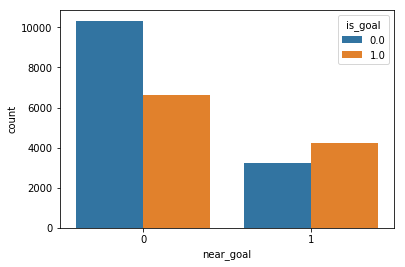

In [37]:
df['near_goal'] = (df['range_of_shot'] <2).astype('int')
pd.crosstab(df['near_goal'], df['is_goal'], margins=True)
sns.countplot(x='near_goal', hue='is_goal', data=df);

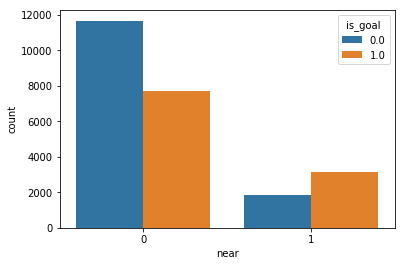

In [38]:
df['near'] = (df['distance_of_shot']<23 ).astype('int')
pd.crosstab(df['near'], df['is_goal'], margins=True)
sns.countplot(x='near', hue='is_goal', data=df);

In [39]:
df2['near'] = (df2['distance_of_shot']<23 ).astype('int')

C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
df2['near_goal'] = (df2['range_of_shot'] <2).astype('int')

C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
df2.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1,is_goal,near,near_goal
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,6,3,3,Manchester United,2000-10-31,MANU @ POR,1,"45.539131, -122.651648",shot - 30,2,20000012,1610612747,10.00,1.00,50.608,54.2,38.0,NaN,0,0
7,7,254.0,1.0,28.0,8.0,3.0,0.0,2000-01,5.0,22.0,1,1,1,Manchester United,2000-10-31,MANU @ POR,8,"45.539131, -122.651648",shot - 17,4,20000012,1610612747,68.64,3.00,0.000,5.0,22.0,NaN,1,1
16,16,100.0,0.0,0.0,0.0,1.0,0.0,2000-01,1.0,20.0,1,1,1,Manchester United,2000-11-01,MANU vs. UTA,17,"42.982923, -71.446094",shot - 12,5,20000019,1610612747,0.00,1.00,0.000,1.0,20.0,NaN,1,1
19,19,249.0,0.0,0.0,10.0,3.0,0.0,2000-01,46.0,20.0,1,3,1,Manchester United,2000-11-01,MANU vs. UTA,20,"42.982923, -71.446094",shot - 4,4,20000019,1610612747,10.00,70.36,0.000,46.0,20.0,NaN,1,1
21,21,265.0,134.0,127.0,9.0,3.0,0.0,2000-01,4.0,38.0,5,3,3,Manchester United,2000-11-01,MANU vs. UTA,22,"42.982923, -71.446094",shot - 24,4,20000019,1610612747,9.00,43.36,0.000,4.0,38.0,NaN,0,0


C:\Users\ACER\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\ACER\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\ACER\Anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:513: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\contour.py:1480: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\contour.py:1481: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


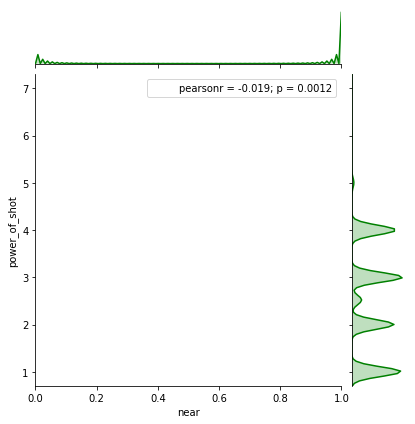

In [42]:
sns.jointplot('near', 'power_of_shot',
              data=df, kind="kde", color="g");

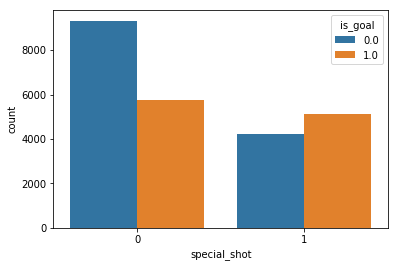

In [43]:
df['special_shot'] = (df['shot_basics']<3 ).astype('int')
pd.crosstab(df['special_shot'], df['is_goal'], margins=True)
sns.countplot(x='special_shot', hue='is_goal', data=df);

In [44]:
s=pd.read_csv("sample_submission.csv")
s.shape

(5000, 2)

In [45]:
s.head()

,shot_id_number,is_goal
0,1,0.1
1,8,0.1
2,17,0.1
3,20,0.1
4,33,0.1


In [46]:
del s['is_goal']

In [47]:
del df2['is_goal']

In [48]:
df2.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1,near,near_goal
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,6,3,3,Manchester United,2000-10-31,MANU @ POR,1,"45.539131, -122.651648",shot - 30,2,20000012,1610612747,10.00,1.00,50.608,54.2,38.0,0,0
7,7,254.0,1.0,28.0,8.0,3.0,0.0,2000-01,5.0,22.0,1,1,1,Manchester United,2000-10-31,MANU @ POR,8,"45.539131, -122.651648",shot - 17,4,20000012,1610612747,68.64,3.00,0.000,5.0,22.0,1,1
16,16,100.0,0.0,0.0,0.0,1.0,0.0,2000-01,1.0,20.0,1,1,1,Manchester United,2000-11-01,MANU vs. UTA,17,"42.982923, -71.446094",shot - 12,5,20000019,1610612747,0.00,1.00,0.000,1.0,20.0,1,1
19,19,249.0,0.0,0.0,10.0,3.0,0.0,2000-01,46.0,20.0,1,3,1,Manchester United,2000-11-01,MANU vs. UTA,20,"42.982923, -71.446094",shot - 4,4,20000019,1610612747,10.00,70.36,0.000,46.0,20.0,1,1
21,21,265.0,134.0,127.0,9.0,3.0,0.0,2000-01,4.0,38.0,5,3,3,Manchester United,2000-11-01,MANU vs. UTA,22,"42.982923, -71.446094",shot - 24,4,20000019,1610612747,9.00,43.36,0.000,4.0,38.0,0,0


In [49]:
d=df

In [50]:
df=df.dropna()

In [51]:
for _ in df.columns:
    print("The number of null values in:{} == {}".format(_, df[_].isnull().sum()))

The number of null values in:Unnamed: 0 == 0
The number of null values in:match_event_id == 0
The number of null values in:location_x == 0
The number of null values in:location_y == 0
The number of null values in:remaining_min == 0
The number of null values in:power_of_shot == 0
The number of null values in:knockout_match == 0
The number of null values in:game_season == 0
The number of null values in:remaining_sec == 0
The number of null values in:distance_of_shot == 0
The number of null values in:area_of_shot == 0
The number of null values in:shot_basics == 0
The number of null values in:range_of_shot == 0
The number of null values in:team_name == 0
The number of null values in:date_of_game == 0
The number of null values in:home/away == 0
The number of null values in:shot_id_number == 0
The number of null values in:lat/lng == 0
The number of null values in:type_of_shot == 0
The number of null values in:type_of_combined_shot == 0
The number of null values in:match_id == 0
The number of

In [52]:
y=df['is_goal']

In [53]:
f=['remaining_min','power_of_shot','near','range_of_shot','area_of_shot','type_of_combined_shot']  #selecting features based on previous test

In [54]:
X=df[f]

In [55]:
x=df[f]

In [56]:
x2=df2[f]

In [57]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24429 entries, 1 to 30696
Data columns (total 6 columns):
remaining_min            24429 non-null float64
power_of_shot            24429 non-null float64
near                     24429 non-null int32
range_of_shot            24429 non-null int64
area_of_shot             24429 non-null int64
type_of_combined_shot    24429 non-null int64
dtypes: float64(2), int32(1), int64(3)
memory usage: 1.2 MB


In [58]:
x.head()

,remaining_min,power_of_shot,near,range_of_shot,area_of_shot,type_of_combined_shot
1,10.000000,1.0,0,2,3,2
2,7.000000,1.0,0,3,2,2
3,6.000000,1.0,0,3,5,4
4,4.883233,2.0,1,1,1,2
5,9.000000,3.0,0,2,3,2


In [59]:
xx=x[0:5000]
yy=y[0:5000]


In [60]:
x2.head()

,remaining_min,power_of_shot,near,range_of_shot,area_of_shot,type_of_combined_shot
0,10.0,1.0,0,3,6,2
7,8.0,3.0,1,1,1,4
16,0.0,1.0,1,1,1,5
19,10.0,3.0,1,1,1,4
21,9.0,3.0,0,3,5,4


In [61]:
model3 = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [62]:
model2=DecisionTreeClassifier(random_state=1)

In [63]:
from sklearn import svm

from sklearn.svm import SVC

In [64]:
model = svm.SVC(kernel='linear', C=1.0,  gamma=1)

In [65]:
model3.fit(x,y)

[21:16:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [66]:
pred=model3.predict(x2)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [67]:
fi=pd.DataFrame()

In [69]:
fi['shot_id_number']=df2['shot_id_number']
fi['is_goal']=pred
fi.head()

,shot_id_number,is_goal
0,1,0.0
7,8,1.0
16,17,1.0
19,20,1.0
21,22,0.0


In [70]:
pred2=pred[0:5000]
pred2.shape

(5000,)

In [71]:
final = pd.merge(s, fi, how='inner')
final.head()

,shot_id_number,is_goal
0,1,0.0
1,8,1.0
2,17,1.0
3,20,1.0
4,33,0.0


In [248]:
final['shot_id_number']=final['shot_id_number'].astype('int64')

In [72]:
output =pd.DataFrame({'shot_id_number':final.shot_id_number,'is_goal':final.is_goal
})
output.to_csv('submission_main.csv',index=False)